In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats as stm
import random
import os
%matplotlib inline
import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r'D:\Internship on ML\T-20 World cup 2022.csv', encoding ="latin1")
df.sample(10)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
1561,23010,1298173,ENG v SL,SL,ENG,ENG,2,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short outside off, Buttler opens up and thumps...",<p>Lahiru Kumara into the attack</p>,NaN
5920,29060,1298151,BAN v NED,BAN,NED,NED,2,10,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Length ball follows Ackermann who was making r...,NaN,"<p>Okay folks, I've lost track of comments. Ev..."
9173,113060,1298137,SCOT v WI,SCOT,WI,SCOT,1,14,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Full and outside off, looks to go through the ...",NaN,NaN
6247,11060,1298149,IRE v SL,IRE,SL,IRE,1,2,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"<strong>Slices a cover drive, in the air and f...",NaN,NaN
189,210010,1298179,ENG v PAK,PAK,ENG,ENG,2,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"back of a length, chopped uppishly to backward...","<p>It's anyone's game, even if England are ahe...",NaN
9278,210030,1298137,SCOT v WI,SCOT,WI,WI,2,11,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Fuller around middle and leg, pushed to long-on.",NaN,NaN
6229,219030,1298150,INDIA v PAK,PAK,INDIA,INDIA,2,20,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"they need a boundary every ball, almost, but t...",<p>Kohli on strike. Fifteen to win off four ba...,NaN
8448,113020,1298140,SL v UAE,SL,UAE,SL,1,14,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"fired past the legs, and the keeper can't gath...",NaN,NaN
1569,24020,1298173,ENG v SL,SL,ENG,ENG,2,5,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,flatter and straighter and pulled through midw...,NaN,NaN
7319,26030,1298145,IRE v WI,WI,IRE,IRE,2,7,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<strong>flicked fine and flicked for four!</st...,NaN,NaN


In [3]:
batting= pd.read_csv(r'D:\Internship on ML\T-20 World cup 2022.csv', encoding ="latin1")
batting.sample(10)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
8705,117080,1298139,NAM v NED,NAM,NED,NAM,1,18,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,pushed down the ground for a single,NaN,NaN
4697,213050,1298158,PAK v ZIM,ZIM,PAK,PAK,2,14,4,0,...,922943.0,Shadab Khan,Sikandar Raza,17.0,14.0,Shadab Khan c Williams b Sikandar Raza 17 (27m...,False,Raza strikes back! Almost a knuckle ball deliv...,NaN,NaN
5092,117020,1298156,BAN v SA,SA,BAN,SA,1,18,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,another yorker fired at 138kph. This was on of...,NaN,"<p>Sanjeev: ""I want Rilee to retire out so tha..."
559,115050,1298177,NZ v PAK,NZ,PAK,NZ,1,16,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Mitchell stays leg-side of this back-of-a-leng...,NaN,NaN
5024,16020,1298156,BAN v SA,SA,BAN,SA,1,7,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Full on off and once more driven into the cove...,NaN,NaN
7050,21030,1298146,SCOT v ZIM,SCOT,ZIM,ZIM,2,2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full on fifth stump, punched firmly to mid-off.",NaN,NaN
1139,212050,1298175,BAN v PAK,BAN,PAK,PAK,2,13,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"<strong>Double-bats a pull, it goes just over ...",NaN,"<p>Sunray: ""One of these must take chances now..."
2577,214030,1298169,BAN v INDIA,INDIA,BAN,BAN,2,15,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<strong>he's hit this deep into the stands! </...,NaN,NaN
5992,160,1298150,INDIA v PAK,PAK,INDIA,PAK,1,1,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<b>superb from DK</b>. Bhuvi looks for the big...,NaN,NaN
4081,114040,1298162,BAN v ZIM,BAN,ZIM,BAN,1,15,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,tucks this into the vacant midwicket region as...,NaN,NaN


In [4]:
bowling = pd.read_csv(r'D:\Internship on ML\T-20 World cup 2022.csv', encoding ="latin1")
bowling.sample(10)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
3423,117020,1298165,AUS v IRE,AUS,IRE,AUS,1,18,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<strong>Tucker can't clasp it!</strong> Was a ...,NaN,NaN
7642,160,1298143,NED v SL,SL,NED,SL,1,1,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,uppish flick down to deep square leg. Steady f...,NaN,NaN
442,212020,1298178,ENG v INDIA,INDIA,ENG,ENG,2,13,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"goes for the hard length again, angling in ove...",NaN,NaN
8975,22010,1298138,IRE v ZIM,ZIM,IRE,IRE,2,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"on a length, fenced to backward point with an ...",NaN,NaN
7342,210020,1298145,IRE v WI,WI,IRE,IRE,2,11,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Back of length over off, nudged to the bowler'...",NaN,NaN
3922,22010,1298163,NED v PAK,NED,PAK,PAK,2,3,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,full and wide outside off and <B>what a way to...,"<p>Fakhar Zaman, not Shan Masood, at No. 3. He...",NaN
2844,13040,1298167,ENG v NZ,ENG,NZ,ENG,1,4,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length ball on middle, goes back to punch...",NaN,NaN
2328,27060,1298170,PAK v SA,PAK,SA,SA,2,8,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"back of a length on fifth stump, goes back to ...",NaN,<p><b>AMA with Urooj Mumtaz</b><br></p><p>Dani...
7537,24010,1298144,NAM v UAE,UAE,NAM,NAM,2,5,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Full length outside off, pushed to mid-on","<p>Hapilan: ""Pressure playing its part! Nothin...",NaN
8205,113040,1298141,IRE v SCOT,SCOT,IRE,SCOT,1,14,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,lofted towards deep square leg but falls short...,NaN,NaN


In [5]:
df.isnull().sum()

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
Wicket                  0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  Wicket             9814 non-null   int64  
 11  shortText          9814 non-null   object 
 12  isBoundary         9814 non-null   bool   
 13  isWide             9814 non-null   bool   
 14  isNoball           9814 non-null   bool   
 15  batsman1_id        9814 non-null   int64  
 16  batsman1_name      9814 

In [7]:
df.rename(columns={'current_innings': 'batting_team'}, inplace=True)
df['batting_team'].unique()

array(['PAK', 'ENG', 'INDIA', 'NZ', 'ZIM', 'BAN', 'NED', 'SA', 'SL',
       'AUS', 'AFG', 'IRE', 'SCOT', 'WI', 'UAE', 'NAM'], dtype=object)

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
country = df['batting_team'].unique()
print(country)

['PAK' 'ENG' 'INDIA' 'NZ' 'ZIM' 'BAN' 'NED' 'SA' 'SL' 'AUS' 'AFG' 'IRE'
 'SCOT' 'WI' 'UAE' 'NAM']


In [11]:
top10_team=['PAK', 'ENG', 'INDIA','NZ','BAN', 'SA', 'SL','AUS','AFG','WI']

#### We will focus on below 10 team only so that our analysis is short & clear

In [12]:
top10_team

['PAK', 'ENG', 'INDIA', 'NZ', 'BAN', 'SA', 'SL', 'AUS', 'AFG', 'WI']

In [13]:
print(df['match_name'].unique())

['ENG v PAK' 'ENG v INDIA' 'NZ v PAK' 'INDIA v ZIM' 'BAN v PAK' 'NED v SA'
 'ENG v SL' 'AUS v AFG' 'IRE v NZ' 'PAK v SA' 'BAN v INDIA' 'NED v ZIM'
 'ENG v NZ' 'AFG v SL' 'AUS v IRE' 'INDIA v SA' 'NED v PAK' 'BAN v ZIM'
 'NZ v SL' 'PAK v ZIM' 'INDIA v NED' 'BAN v SA' 'ENG v IRE' 'AUS v SL'
 'SA v ZIM' 'BAN v NED' 'INDIA v PAK' 'IRE v SL' 'AFG v ENG' 'AUS v NZ'
 'SCOT v ZIM' 'IRE v WI' 'NAM v UAE' 'NED v SL' 'WI v ZIM' 'IRE v SCOT'
 'SL v UAE' 'NAM v NED' 'IRE v ZIM' 'SCOT v WI' 'NED v UAE' 'NAM v SL']


#### Top10 highest scorer batsman

In [14]:
# Split 'match_name' into two new columns: 'team1' and 'team2'
df[['team1', 'team2']] = df['match_name'].str.split(' v ', expand=True)

# Add a new column 'bowling_team' with the team not present in 'current_inning'
df['bowling_team'] = df.apply(lambda row: row['team2'] if row['batting_team'] == row['team1'] else row['team1'], axis=1)

df.drop(columns= ['team1', 'team2'], inplace= True )
df['bowling_team'].unique()

array(['ENG', 'PAK', 'INDIA', 'NZ', 'ZIM', 'BAN', 'SA', 'NED', 'SL',
       'AFG', 'AUS', 'IRE', 'SCOT', 'WI', 'NAM', 'UAE'], dtype=object)

In [15]:
total_run=df.groupby('batsman1_name',as_index=False)['runs'].sum().sort_values('runs',ascending =False)[:10]
total_run

,batsman1_name,runs
187,Virat Kohli,310
110,Max O'Dowd,261
83,Jos Buttler,241
173,Suryakumar Yadav,236
139,Pathum Nissanka,232
167,Sikandar Raza,230
96,Kusal Mendis,229
6,Alex Hales,218
102,Lorcan Tucker,217
64,Glenn Phillips,209


In [21]:
total_wickets=df.groupby('bowler1_name',as_index=False)['Wicket'].sum().sort_values('Wicket',ascending =False)[:10]
total_wickets

,bowler1_name,Wicket
112,Shaheen Shah Afridi,25
60,Josh Little,25
104,Richard Ngarava,19
22,Blessing Muzarabani,18
109,Sam Curran,16
8,Anrich Nortje,15
111,Shadab Khan,15
113,Shakib Al Hasan,15
50,Haris Rauf,14
74,Lungi Ngidi,13


In [22]:
def filtered_df(df, columns, top_teams):
    condition = df['batting_team'].isin(top_teams) & df['bowling_team'].isin(top_teams)
    return df.loc[condition, columns]

In [23]:
batting_df= ['batting_team','batsman1_name','batsman1_runs']
for i in country:
    filtered1 = filtered_df(df,batting_df,top10_team)
filtered1.rename(columns={'batsman1_name':'batsman_name'}, inplace=True)
filtered1=filtered1.groupby('batsman_name').max().sort_values(by='batsman1_runs',ascending=False)[:10]
filtered1

,batting_team,batsman1_runs
batsman_name,,
Rilee Rossouw,SA,109
Glenn Phillips,NZ,104
Devon Conway,NZ,92
Alex Hales,ENG,86
Virat Kohli,INDIA,82
Jos Buttler,ENG,80
Suryakumar Yadav,INDIA,68
Pathum Nissanka,SL,67
Dhananjaya de Silva,SL,66


## Top 10 bowlers

In [27]:
bowling_df= ['bowling_team','bowler1_name','bowler1_wkts']
for i in country:
     filtered = filtered_df(df,bowling_df,top10_team)
filtered.groupby('bowler1_name').max().sort_values(by='bowler1_wkts',ascending=False)[:10]

,bowling_team,bowler1_wkts
bowler1_name,,
Sam Curran,ENG,5
Trent Boult,NZ,4
Anrich Nortje,SA,4
Lungi Ngidi,SA,4
Shaheen Shah Afridi,PAK,4
Wayne Parnell,SA,3
Hardik Pandya,INDIA,3
Mark Wood,ENG,3
Mitchell Santner,NZ,3


### Now take a glance of a particular Team-- T20 world cup 2022 winner "England"

### Since our analysis is mostly on ENGLAND, we create a dataframe containing only ENGLAND's games:

In [24]:
top_runs = df[['batsman1_name','runs']].loc[df['batting_team']=='ENG'].groupby('batsman1_name').sum().sort_values(by='runs',ascending=False)[0:5]
top_run_getters = top_runs.index
top_run_getters

Index(['Jos Buttler', 'Alex Hales', 'Ben Stokes', 'Dawid Malan', 'Moeen Ali'], dtype='object', name='batsman1_name')

In [25]:
top5_eng = df[['match_name','batsman1_name','batsman1_runs']].loc[(df['batting_team']=='ENG') & (df['batsman1_name'].isin(top_run_getters))].groupby(['match_name','batsman1_name']).max().sort_index().unstack()
top5_eng = top5_eng.cumsum()
top5_eng

batsman1_runs                                             
batsman1_name    Alex Hales Ben Stokes Dawid Malan Jos Buttler Moeen Ali
match_name                                                              
AFG v ENG              19.0        2.0        18.0        18.0       8.0
ENG v INDIA           105.0        NaN         NaN        98.0       NaN
ENG v IRE             112.0        8.0        53.0        98.0      32.0
ENG v NZ              164.0       16.0        56.0       171.0      37.0
ENG v PAK             165.0       68.0         NaN       197.0      56.0
ENG v SL              212.0      110.0         NaN       225.0      57.0

In [49]:
df.loc[df['batting_team'] =='ENG',['batting_team','batsman1_name','batsman1_runs']].groupby('batsman1_name').max().sort_values(by='batsman1_runs',ascending=False)[:10]

,batting_team,batsman1_runs
batsman1_name,,
Alex Hales,ENG,86
Jos Buttler,ENG,80
Ben Stokes,ENG,52
Dawid Malan,ENG,35
Liam Livingstone,ENG,29
Moeen Ali,ENG,24
Harry Brook,ENG,20
Phil Salt,ENG,10
Sam Curran,ENG,6


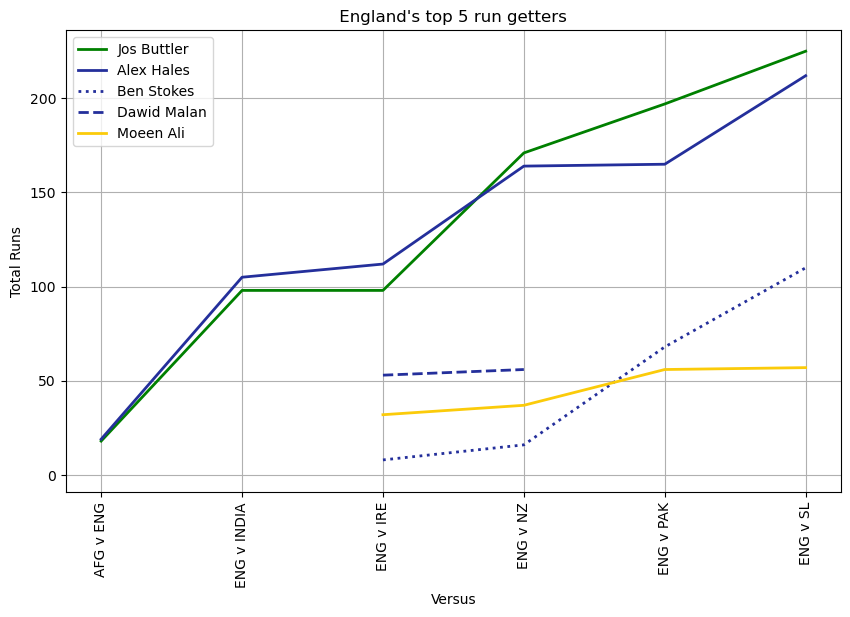

In [26]:
plt.figure(figsize=(10,6))
plt.plot(top5_eng[('batsman1_runs','Jos Buttler')], label='Jos Buttler', color='Green', linewidth=2)
plt.plot(top5_eng[('batsman1_runs','Alex Hales')], label='Alex Hales', color='#242F9B', linewidth=2)
plt.plot(top5_eng[('batsman1_runs','Ben Stokes')], label='Ben Stokes', color='#242F9B', linewidth=2, linestyle=':')
plt.plot(top5_eng[('batsman1_runs','Dawid Malan')], label='Dawid Malan', color='#242F9B', linewidth=2, linestyle='--')
plt.plot(top5_eng[('batsman1_runs','Moeen Ali')], label='Moeen Ali', color='#FBCB0A', linewidth=2)

plt.title(" England's top 5 run getters ")
plt.xticks(rotation=90)
plt.xlabel('Versus')
plt.ylabel('Total Runs')
plt.legend()
plt.grid()
plt.savefig('England top scorers', bbox_inches='tight')
plt.show()

In [29]:
ENG_results=df.loc[(df['home_team']=='ENG') | (df['away_team']=='ENG'), :].copy()
ENG_results.drop(columns=['home_team','away_team'], inplace= True)
ENG_results.columns

Index(['comment_id', 'match_id', 'match_name', 'batting_team', 'innings_id',
       'over', 'ball', 'runs', 'Wicket', 'shortText', 'isBoundary', 'isWide',
       'isNoball', 'batsman1_id', 'batsman1_name', 'batsman1_runs',
       'batsman1_balls', 'bowler1_id', 'bowler1_name', 'bowler1_overs',
       'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts', 'batsman2_id',
       'batsman2_name', 'batsman2_runs', 'batsman2_balls', 'bowler2_id',
       'bowler2_name', 'bowler2_overs', 'bowler2_maidens', 'bowler2_runs',
       'bowler2_wkts', 'wicket_id', 'wkt_batsman_name', 'wkt_bowler_name',
       'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt',
       'text', 'preText', 'postText', 'bowling_team'],
      dtype='object')

In [48]:
df.loc[df['bowling_team'] =='ENG',['bowling_team','bowler1_name','bowler1_wkts']].groupby('bowler1_name').max().sort_values(by='bowler1_wkts',ascending=False)[:10]

,bowling_team,bowler1_wkts
bowler1_name,,
Sam Curran,ENG,5
Chris Jordan,ENG,3
Liam Livingstone,ENG,3
Mark Wood,ENG,3
Adil Rashid,ENG,2
Ben Stokes,ENG,2
Chris Woakes,ENG,2
Moeen Ali,ENG,0


In [30]:
eng_match_id=ENG_results['match_id']

eng_match_id

0       1298179
1       1298179
2       1298179
3       1298179
4       1298179
         ...   
6682    1298148
6683    1298148
6684    1298148
6685    1298148
6686    1298148
Name: match_id, Length: 1409, dtype: int64

In [31]:
eng_details = df.loc[df['match_id'].isin(eng_match_id)]
eng_bowling = eng_details.loc[(eng_details['batting_team']!='ENG') & (eng_details['wkt_text']!="")]

eng_top_bowlers = eng_bowling['bowler1_name'].value_counts()[:].index
eng_top_bowlers

Index(['Adil Rashid', 'Sam Curran', 'Chris Woakes', 'Ben Stokes', 'Mark Wood',
       'Liam Livingstone', 'Chris Jordan', 'Moeen Ali'],
      dtype='object', name='bowler1_name')

In [32]:
eng_bowling.sample(5)

,comment_id,match_id,match_name,home_team,away_team,batting_team,innings_id,over,ball,runs,...,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText,bowling_team
122,119020,1298179,ENG v PAK,PAK,ENG,PAK,1,20,2,0,...,NaN,NaN,NaN,NaN,NaN,False,"another ball into the pitch, hopping over the ...",NaN,NaN,ENG
5309,115030,1298154,ENG v IRE,IRE,ENG,IRE,1,16,3,0,...,Andy Balbirnie,Liam Livingstone,62.0,47.0,A Balbirnie c Hales b Livingstone 62 (74m 47b ...,False,<strong>#MCGsobig and Balbirnie holes out.</st...,NaN,NaN,ENG
1463,17010,1298173,ENG v SL,SL,ENG,SL,1,8,1,0,...,NaN,NaN,NaN,NaN,NaN,False,"looped up outside off, driven to cover",NaN,NaN,ENG
6515,110040,1298148,AFG v ENG,AFG,ENG,AFG,1,11,4,2,...,NaN,NaN,NaN,NaN,NaN,False,"rocks back, and pulls between long-on and deep...",NaN,NaN,ENG
105,116030,1298179,ENG v PAK,PAK,ENG,PAK,1,17,3,0,...,Shan Masood,Sam Curran,38.0,28.0,Shan Masood c Livingstone b Curran 38 (46m 28b...,False,<B>flicked in the air to Livingstone at midwic...,NaN,NaN,ENG


In [33]:
eng_bowling = eng_bowling.loc[eng_bowling['bowler1_name'].isin(eng_top_bowlers)]
eng_bowling = eng_bowling[['match_id','bowler1_name','bowler1_wkts']].groupby(['match_id','bowler1_name']).max().unstack()
eng_bowling=eng_bowling.cumsum()
eng_bowling

bowler1_wkts                                       \
bowler1_name  Adil Rashid Ben Stokes Chris Jordan Chris Woakes   
match_id                                                         
1298148               0.0        2.0          NaN          1.0   
1298154               0.0        3.0          NaN          1.0   
1298167               0.0        4.0          NaN          3.0   
1298173               1.0        5.0          NaN          4.0   
1298178               2.0        5.0          3.0          5.0   
1298179               4.0        6.0          5.0          5.0   

                                                              
bowler1_name Liam Livingstone Mark Wood Moeen Ali Sam Curran  
match_id                                                      
1298148                   NaN       2.0       NaN        5.0  
1298154                   3.0       5.0       NaN        7.0  
1298167                   3.0       6.0       0.0        9.0  
1298173                   3.0       9.0       0.0       10.0  
1298178                   3.0       NaN       NaN       10.0  
1298179                   3.0       NaN       NaN       13.0

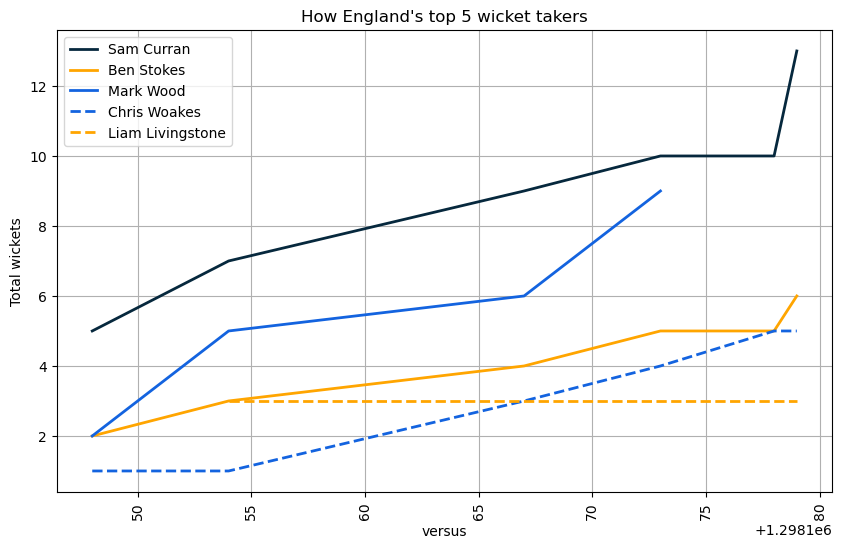

In [34]:
plt.figure(figsize=(10,6))
# plt.style.use('seaborn')
plt.plot(eng_bowling['bowler1_wkts','Sam Curran'],color='#06283D',linewidth=2, label='Sam Curran')
plt.plot(eng_bowling['bowler1_wkts','Ben Stokes'],color='#FFA500',linewidth=2, label='Ben Stokes')
plt.plot(eng_bowling['bowler1_wkts','Mark Wood'],color='#1363DF',linewidth=2, label='Mark Wood')
plt.plot(eng_bowling['bowler1_wkts','Chris Woakes'],color='#1363DF',linewidth=2, linestyle='--', label='Chris Woakes')
plt.plot(eng_bowling['bowler1_wkts','Liam Livingstone'],color='#FFA500',linestyle='--',linewidth=2, label='Liam Livingstone')
plt.xlabel('versus')
plt.ylabel('Total wickets')
plt.xticks(rotation=90)
plt.title("How England's top 5 wicket takers")
plt.legend()
plt.grid(True)
# plt.savefig('top wicket takers.png',bbox_inches='tight')
plt.show()

In [35]:
df1 = pd.read_csv(r'D:\Internship on ML\summary.csv', encoding ="latin1")
df1.sample(10)

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
24,NaN,1298155,Afghanistan v New Zealand,AFG v NZ,"21st Match, Group 1 (N), ICC Men's T20 World C...",AFG,NZ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2022.0,1298139,Namibia v Netherlands,NAM v NED,"5th Match, First Round Group A (D/N), ICC Men'...",NAM,NED,Namibia,BAT FIRST,121/6,...,"Michael van Lingen (AR),Divan la Cock (UKN),St...","Max O'Dowd (UKN),Vikramjit Singh (UKN),Bas de ...","Vikramjit Singh,Max O'Dowd","Bas de Leede,Roelof van der Merwe",18 October 2022 - day/night match (20-over match),Richard Kettleborough,Joel Wilson,Marais Erasmus,Ranjan Madugalle,Rod Tucker
5,2022.0,1298174,Netherlands v South Africa,NED v SA,"40th Match, Group 2, ICC Men's T20 World Cup a...",NED,SA,South Africa,BOWL FIRST,158/4,...,"Stephan Myburgh (UKN),Max O'Dowd (UKN),Tom Coo...","Quinton de Kock (WK),Temba Bavuma (UKN),Rilee ...","Rilee Rossouw,Heinrich Klaasen","Keshav Maharaj,Anrich Nortje",6 November 2022 (20-over match),Michael Gough,Langton Rusere,Richard Illingworth,Chris Broad,Joel Wilson
29,2022.0,1298150,India v Pakistan,INDIA v PAK,"16th Match, Group 2 (N), ICC Men's T20 World C...",INDIA,PAK,India,BOWL FIRST,159/8,...,"KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Mohammad Rizwan (WK),Babar Azam (UKN),Shan Mas...","Shan Masood,Iftikhar Ahmed","Haris Rauf,Mohammad Nawaz",23 October 2022 - night match (20-over match),Marais Erasmus,Rod Tucker,Richard Kettleborough,Ranjan Madugalle,Joel Wilson
41,2022.0,1298138,Ireland v Zimbabwe,IRE v ZIM,"4th Match, First Round Group B (N), ICC Men's ...",IRE,ZIM,Ireland,BOWL FIRST,174/7,...,"Paul Stirling (AR),Andy Balbirnie (UKN),Lorcan...","Regis Chakabva (WK),Craig Ervine (UKN),Wessly ...","Sikandar Raza,Wessly Madhevere","Blessing Muzarabani,Richard Ngarava",17 October 2022 - night match (20-over match),Chris Brown,Kumar Dharmasena,Aleem Dar,Chris Broad,Paul Wilson
14,2022.0,1298165,Australia v Ireland,AUS v IRE,"31st Match, Group 1 (N), ICC Men's T20 World C...",AUS,IRE,Ireland,BOWL FIRST,179/5,...,"David Warner (UKN),Aaron Finch (UKN),Mitchell ...","Paul Stirling (AR),Andy Balbirnie (UKN),Lorcan...","Lorcan Tucker,Gareth Delany","Barry McCarthy,Josh Little",31 October 2022 - night match (20-over match),Chris Gaffaney,Nitin Menon,Kumar Dharmasena,Chris Broad,Ahsan Raza
18,2022.0,1298161,New Zealand v Sri Lanka,NZ v SL,"27th Match, Group 1 (N), ICC Men's T20 World C...",NZ,SL,New Zealand,BAT FIRST,167/7,...,"Finn Allen (UKN),Devon Conway (WK),Kane Willia...","Pathum Nissanka (UKN),Kusal Mendis (WK),Dhanan...","Dasun Shanaka,Bhanuka Rajapaksa","Kasun Rajitha,Dhananjaya de Silva",29 October 2022 - night match (20-over match),Michael Gough,Paul Wilson,Ahsan Raza,Andy Pycroft,Rod Tucker
26,2022.0,1298153,Australia v Sri Lanka,AUS v SL,"19th Match, Group 1 (N), ICC Men's T20 World C...",AUS,SL,Australia,BOWL FIRST,157/6,...,"David Warner (UKN),Aaron Finch (UKN),Mitchell ...","Pathum Nissanka (UKN),Kusal Mendis (WK),Dhanan...","Pathum Nissanka,Charith Asalanka","Chamika Karunaratne,Dhananjaya de Silva",25 October 2022 - night match (20-over match),Marais Erasmus,Richard Illingworth,Richard Kettleborough,Andy Pycroft,Aleem Dar
11,2022.0,1298168,Netherlands v Zimbabwe,NED v ZIM,"34th Match, Group 2, ICC Men's T20 World Cup a...",NED,ZIM,Zimbabwe,BAT FIRST,117,...,"Stephan Myburgh (UKN),Max O'Dowd (UKN),Tom Coo...","Wessly Madhevere (AR),Craig Ervine (UKN),Regis...","Sikandar Raza,Sean Williams","Richard Ngarava,Blessing Muzarabani",2 November 2022 (20-over match),Adrian Holdstock,Richard Illingworth,Chris Brown,David Boon,Marais Erasmus
22,2022.0,1298157,India v Netherlands,INDIA v NED,"23rd Match, Group 2 (N), ICC Men's T20 World C...",INDIA,NED,India,BAT FIRST,179/2,...,"KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Vikramjit Singh (UKN),Max O'Dowd (UKN),

In [36]:
ENG_results=df1.loc[(df1['home_team']=='ENG') | (df1['away_team']=='ENG'), :].copy()
ENG_results.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [37]:
ENG_results['Vs'] = ENG_results['home_team'] + ENG_results['away_team']
ENG_results['Vs'] = ENG_results['Vs'].str.replace('ENG', '')

ENG_results.drop(['home_team','away_team','reserve_umpire','description','match_days', 'umpire1','umpire2', 'tv_umpire', 'referee'], axis=1, inplace=True)

In [38]:
ENG_results['WinningTeam'] = ENG_results['winner'].apply(lambda x: 'Win' if x=='ENG' else 'Loss')
# ENG_results.set_index('id', inplace=True)
ENG_results.reset_index(inplace=True)

In [39]:
ENG_results.head(5)

,index,season,id,name,short_name,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,...,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,Vs,WinningTeam
0,0,2022.0,1298179,England v Pakistan,ENG v PAK,England,BOWL FIRST,137/8,138/5,138/5,...,10.0,NaN,"Ben Stokes,Jos Buttler","Sam Curran,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","Mohammad Rizwan (WK),Babar Azam (UKN),Mohammad...","Shan Masood,Babar Azam","Haris Rauf,Shaheen Shah Afridi",PAK,Win
1,1,2022.0,1298178,England v India,ENG v INDIA,England,BOWL FIRST,168/6,170/0,170/0,...,22.0,Alex Hales and Jos Buttler carry England into ...,"Alex Hales,Jos Buttler","Chris Jordan,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Hardik Pandya,Virat Kohli","Hardik Pandya,Bhuvneshwar Kumar",INDIA,Win
2,6,2022.0,1298173,England v Sri Lanka,ENG v SL,Sri Lanka,BAT FIRST,141/8,144/6,144/6,...,13.0,Ben Stokes guides nervy England through to Wor...,"Alex Hales,Ben Stokes","Mark Wood,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Ben Stokes (...","Pathum Nissanka (UKN),Kusal Mendis (WK),Dhanan...","Pathum Nissanka,Bhanuka Rajapaksa","Wanindu Hasaranga de Silva,Dhananjaya de Silva",SL,Win
3,12,2022.0,1298167,England v New Zealand,ENG v NZ,England,BAT FIRST,179/6,159/6,179/6,...,13.0,"Jos Buttler, Sam Curran fire as England ignite...","Jos Buttler,Alex Hales","Sam Curran,Chris Woakes","Jos Buttler (WK),Alex Hales (UKN),Moeen Ali (A...","Finn Allen (UKN),Devon Conway (WK),Kane Willia...","Glenn Phillips,Kane Williamson","Lockie Ferguson,Ish Sodhi",NZ,Win
4,19,NaN,1298160,Australia v England,AUS v ENG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUS,Win


In [40]:
eng_venue_wise1 = ENG_results.groupby(['venue_name','WinningTeam']).count()['name']
eng_venue_wise1 = eng_venue_wise1.unstack()
eng_venue_wise1.sort_values(by=['Loss','Win'],ascending=[False,True],inplace=True)
print(eng_venue_wise1)

WinningTeam                                       Loss  Win
venue_name                                                 
Melbourne Cricket Ground                           1.0  2.0
Adelaide Oval                                      NaN  1.0
Brisbane Cricket Ground, Woolloongabba, Brisbane   NaN  1.0
Perth Stadium                                      NaN  1.0
Sydney Cricket Ground                              NaN  1.0


<Figure size 1600x600 with 0 Axes>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

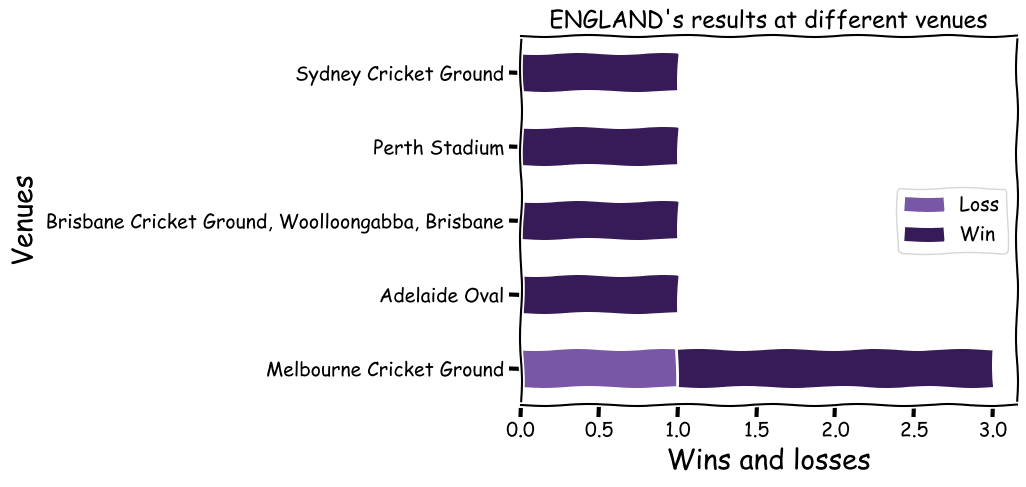

In [41]:
plt.xkcd()
plt.figure(figsize=(16,6))
eng_venue_wise1.plot(kind='barh' , stacked=True, color=['#7858A6','#371B58'])
plt.title("ENGLAND's results at different venues")
plt.legend(loc=7)
plt.xlabel('Wins and losses', fontsize=20)
plt.ylabel('Venues', fontsize=20)

# plt.savefig('Venue-wise results', bbox_inches='tight')
plt.show()

In [42]:
ENG_results['Toss'] = ENG_results['toss_won'].apply(lambda x: 'Won the toss' if x=='Eng' else 'Lost the toss')
ENG_results.rename(columns={'WinningTeam':'Result'}, inplace=True)
ENG_results.drop('toss_won', axis=1)
ENG_results

,index,season,id,name,short_name,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,...,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,Vs,Result,Toss
0,0,2022.0,1298179,England v Pakistan,ENG v PAK,England,BOWL FIRST,137/8,138/5,138/5,...,NaN,"Ben Stokes,Jos Buttler","Sam Curran,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","Mohammad Rizwan (WK),Babar Azam (UKN),Mohammad...","Shan Masood,Babar Azam","Haris Rauf,Shaheen Shah Afridi",PAK,Win,Lost the toss
1,1,2022.0,1298178,England v India,ENG v INDIA,England,BOWL FIRST,168/6,170/0,170/0,...,Alex Hales and Jos Buttler carry England into ...,"Alex Hales,Jos Buttler","Chris Jordan,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Hardik Pandya,Virat Kohli","Hardik Pandya,Bhuvneshwar Kumar",INDIA,Win,Lost the toss
2,6,2022.0,1298173,England v Sri Lanka,ENG v SL,Sri Lanka,BAT FIRST,141/8,144/6,144/6,...,Ben Stokes guides nervy England through to Wor...,"Alex Hales,Ben Stokes","Mark Wood,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Ben Stokes (...","Pathum Nissanka (UKN),Kusal Mendis (WK),Dhanan...","Pathum Nissanka,Bhanuka Rajapaksa","Wanindu Hasaranga de Silva,Dhananjaya de Silva",SL,Win,Lost the toss
3,12,2022.0,1298167,England v New Zealand,ENG v NZ,England,BAT FIRST,179/6,159/6,179/6,...,"Jos Buttler, Sam Curran fire as England ignite...","Jos Buttler,Alex Hales","Sam Curran,Chris Woakes","Jos Buttler (WK),Alex Hales (UKN),Moeen Ali (A...","Finn Allen (UKN),Devon Conway (WK),Kane Willia...","Glenn Phillips,Kane Williamson","Lockie Ferguson,Ish Sodhi",NZ,Win,Lost the toss
4,19,NaN,1298160,Australia v England,AUS v ENG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUS,Win,Lost the toss
5,25,2022.0,1298154,England v Ireland,ENG v IRE,England,BOWL FIRST,157,105/5,105/5,...,Ireland stun England in rainy Melbourne. The u...,"Dawid Malan,Moeen Ali","Liam Livingstone,Mark Wood","Jos Buttler (WK),Alex Hales (UKN),Dawid Malan ...","Paul Stirling (AR),Andy Balbirnie (UKN),Lorcan...","Andy Balbirnie,Lorcan Tucker","Josh Little,George Dockrell",IRE,Loss,Lost the toss
6,31,2022.0,1298148,Afghanistan v England,AFG v ENG,England,BOWL FIRST,112,113/5,112,...,Sam Curran five-for sees England past Afghanis...,"Ibrahim Zadran,Usman Ghani","Rashid Khan,Mohammad Nabi","Hazratullah Zazai (UKN),Rahmanullah Gurbaz (WK...","Jos Buttler (WK),Alex Hales (UKN),Dawid Malan ...","Liam Livingstone,Alex Hales","Sam Curran,Ben Stokes",AFG,Win,Lost the toss


In [43]:
ENG_results['First Innings'] = np.where(ENG_results['toss_won']=='India',ENG_results['decision'],''+ENG_results['decision'])
ENG_results['First Innings'] = ENG_results['First Innings'].str.replace('BAT FIRST','bat')
ENG_results['First Innings'] = ENG_results['First Innings'].str.replace('BOWL FIRST','field')
ENG_results.drop('toss_won', axis=1, inplace=True)
ENG_results.drop('decision', axis=1, inplace=True)
ENG_results

,index,season,id,name,short_name,1st_inning_score,2nd_inning_score,home_score,away_score,winner,...,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,Vs,Result,Toss,First Innings
0,0,2022.0,1298179,England v Pakistan,ENG v PAK,137/8,138/5,138/5,137/8,ENG,...,"Ben Stokes,Jos Buttler","Sam Curran,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","Mohammad Rizwan (WK),Babar Azam (UKN),Mohammad...","Shan Masood,Babar Azam","Haris Rauf,Shaheen Shah Afridi",PAK,Win,Lost the toss,field
1,1,2022.0,1298178,England v India,ENG v INDIA,168/6,170/0,170/0,168/6,ENG,...,"Alex Hales,Jos Buttler","Chris Jordan,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Hardik Pandya,Virat Kohli","Hardik Pandya,Bhuvneshwar Kumar",INDIA,Win,Lost the toss,field
2,6,2022.0,1298173,England v Sri Lanka,ENG v SL,141/8,144/6,144/6,141/8,ENG,...,"Alex Hales,Ben Stokes","Mark Wood,Adil Rashid","Jos Buttler (WK),Alex Hales (UKN),Ben Stokes (...","Pathum Nissanka (UKN),Kusal Mendis (WK),Dhanan...","Pathum Nissanka,Bhanuka Rajapaksa","Wanindu Hasaranga de Silva,Dhananjaya de Silva",SL,Win,Lost the toss,bat
3,12,2022.0,1298167,England v New Zealand,ENG v NZ,179/6,159/6,179/6,159/6,ENG,...,"Jos Buttler,Alex Hales","Sam Curran,Chris Woakes","Jos Buttler (WK),Alex Hales (UKN),Moeen Ali (A...","Finn Allen (UKN),Devon Conway (WK),Kane Willia...","Glenn Phillips,Kane Williamson","Lockie Ferguson,Ish Sodhi",NZ,Win,Lost the toss,bat
4,19,NaN,1298160,Australia v England,AUS v ENG,NaN,NaN,NaN,NaN,ENG,...,NaN,NaN,NaN,NaN,NaN,NaN,AUS,Win,Lost the toss,NaN
5,25,2022.0,1298154,England v Ireland,ENG v IRE,157,105/5,105/5,157,IRE,...,"Dawid Malan,Moeen Ali","Liam Livingstone,Mark Wood","Jos Buttler (WK),Alex Hales (UKN),Dawid Malan ...","Paul Stirling (AR),Andy Balbirnie (UKN),Lorcan...","Andy Balbirnie,Lorcan Tucker","Josh Little,George Dockrell",IRE,Loss,Lost the toss,field
6,31,2022.0,1298148,Afghanistan v England,AFG v ENG,112,113/5,112,113/5,ENG,...,"Ibrahim Zadran,Usman Ghani","Rashid Khan,Mohammad Nabi","Hazratullah Zazai (UKN),Rahmanullah Gurbaz (WK...","Jos Buttler (WK),Alex Hales (UKN),Dawid Malan ...","Liam Livingstone,Alex Hales","Sam Curran,Ben Stokes",AFG,Win,Lost the toss,field


In [45]:
toss_stats = ENG_results[['Result','Toss','First Innings']].groupby(['Toss','Result']).count()
toss_stats

First Innings
Toss          Result               
Lost the toss Loss                1
              Win                 5

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

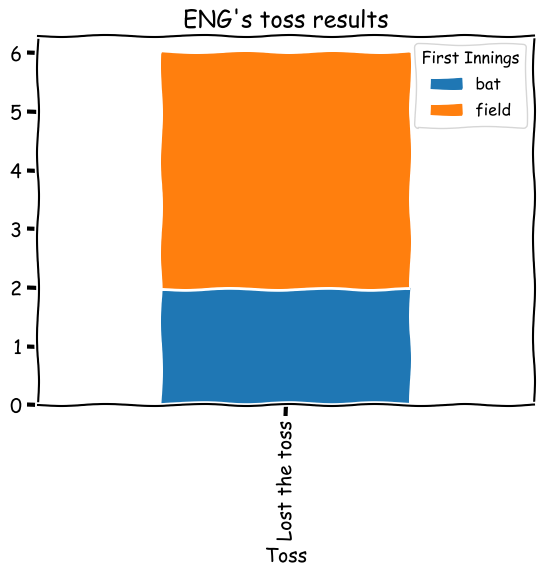

In [50]:
pd.crosstab(ENG_results['Toss'], ENG_results['First Innings']).plot(kind='bar', stacked=True)
plt.title("ENG's toss results")
plt.legend(fontsize='small',title_fontsize='small', title='First Innings')
# plt.savefig('Toss Results.png', bbox_inches='tight')
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

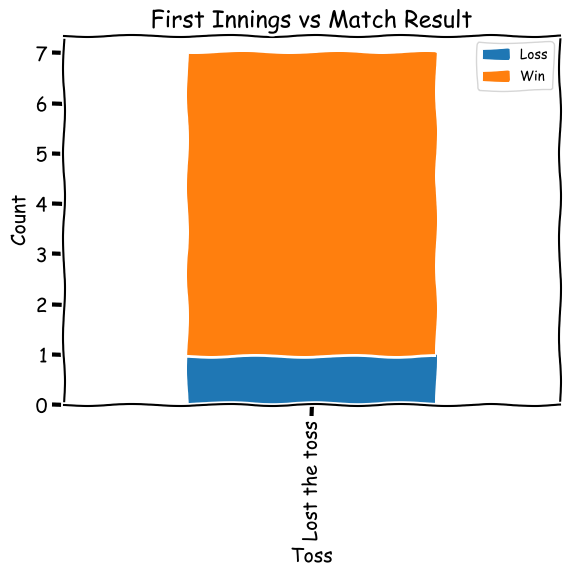

In [46]:
pd.crosstab(ENG_results['Toss'],ENG_results['Result']).plot(kind='bar',stacked=True)
plt.title('First Innings vs Match Result')
plt.legend(fontsize='x-small')
plt.ylabel('Count')
plt.show()

In [47]:
total_runs= ['batting_team','batsman1_name','batsman1_runs','batsman2_name','batsman2_runs']
for i in country:
    filtered2 = filtered_df(df,total_runs,top10_team)
filtered2.rename(columns={'batsman1_name':'batsman_name'}, inplace=True)
filtered2=filtered2.groupby('batsman_name').sum('runs').sort_values(by='batsman1_runs',ascending=False)[:10]
filtered2

,batsman1_runs,batsman2_runs
batsman_name,,
Jos Buttler,4326,3619
Glenn Phillips,4317,2318
Alex Hales,4149,2598
Virat Kohli,4029,2070
Rilee Rossouw,3073,1539
Devon Conway,3008,905
Pathum Nissanka,2589,553
Mohammad Rizwan,2175,1317
Kane Williamson,2053,2007
